In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
data = pd.read_csv('OnlineNewsPopularity.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [93]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [94]:
days = data.columns.values[31:38]
days

array([' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday'],
      dtype=object)

In [95]:
popular=data[data[' shares']>=1000]
unpopular=data[data[' shares']<1000]

In [96]:
unpopular_day = unpopular[days].sum().values
popular_day = popular[days].sum().values

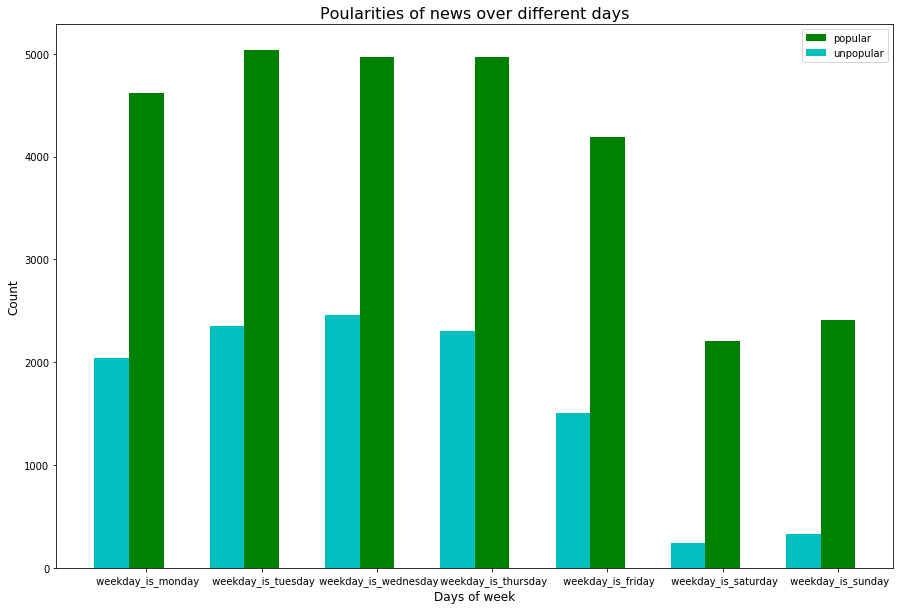

In [97]:
fig = plt.figure(figsize = (15,10))
plt.title("Poularities of news over different days", fontsize = 16)
plt.bar(np.arange(len(days)), popular_day, width = 0.3, align="center", color = 'g',label = "popular")
plt.bar(np.arange(len(days)) - 0.3, unpopular_day, width = 0.3, align = "center", color = 'c',label = "unpopular")
plt.xticks(np.arange(len(days)), days)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
plt.legend()

In [98]:
columns_slice = data.columns.values[31:61]
columns_slice

array([' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03',
       ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_positive_words', ' rate_negative_words',
       ' avg_positive_polarity', ' min_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' min_negative_polarity', ' max_negative_polarity',
       ' title_subjectivity', ' title_sentiment_polarity',
       ' abs_title_subjectivity', ' abs_title_sentiment_polarity',
       ' shares'], dtype=object)

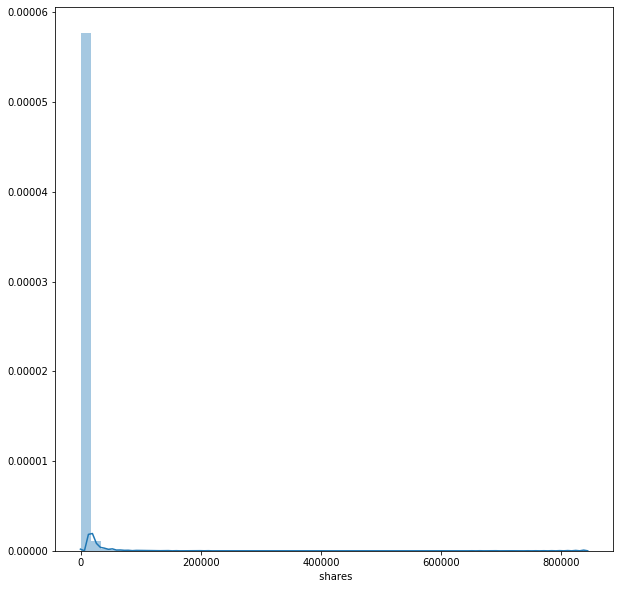

In [99]:
fig = plt.figure(figsize = (10,10))
sns.distplot(data[' shares'])

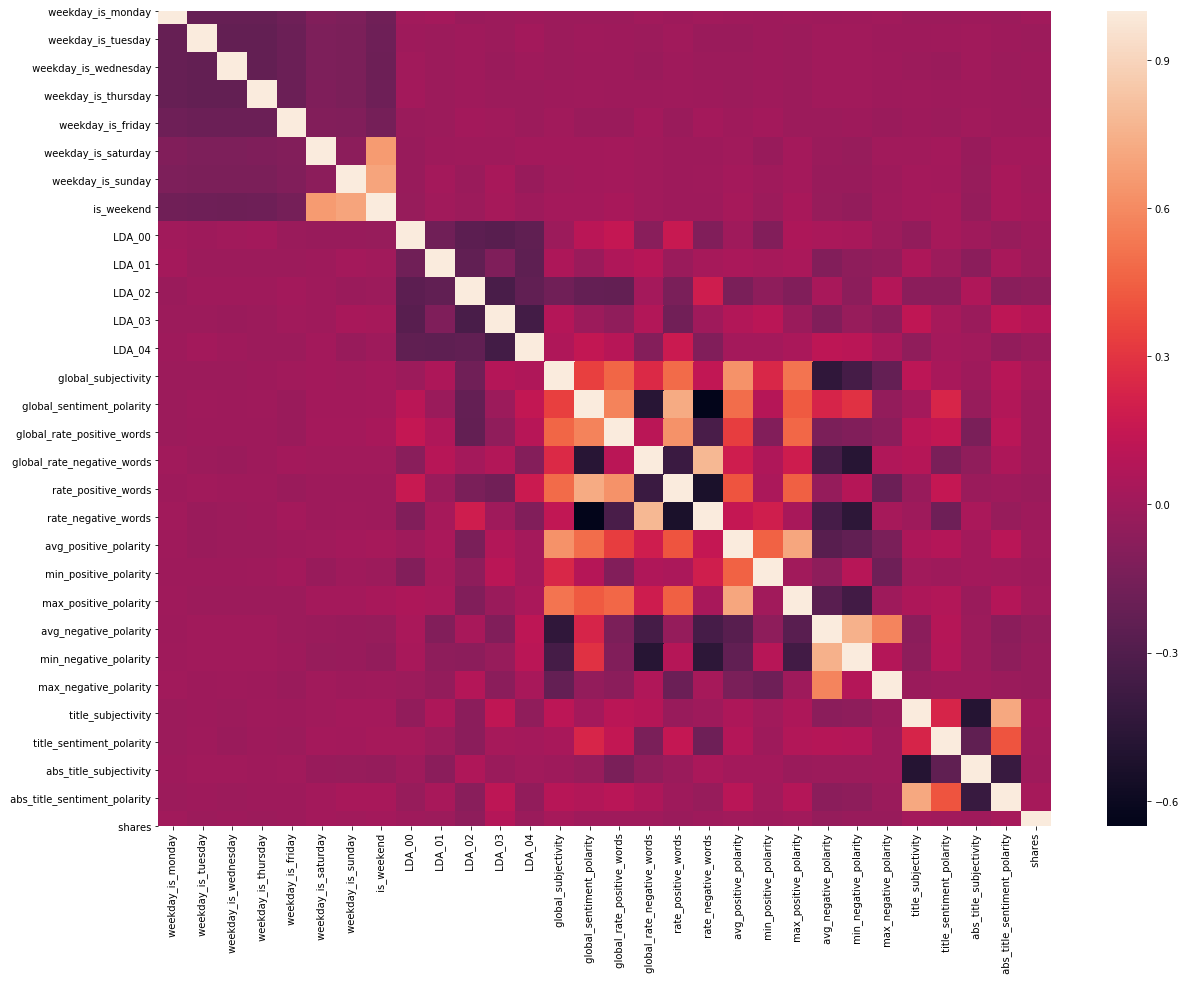

In [100]:
fig = plt.figure(figsize = (20,15))
sns.heatmap(data[columns_slice].corr())

In [75]:
X = data.drop(['url',' shares'],axis=1)
X

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


In [112]:
X.shape

(39644, 59)

In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              39644 non-null float64
 data_channel_is_socmed           39

In [113]:
y = data[' shares']
y

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name:  shares, Length: 39644, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# LINEAR REGRESSION MODEL

In [81]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

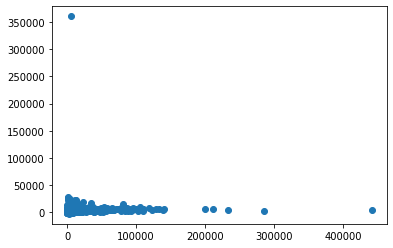

In [83]:
predictions = lr.predict(X_test)
plt.scatter(y_test,predictions)

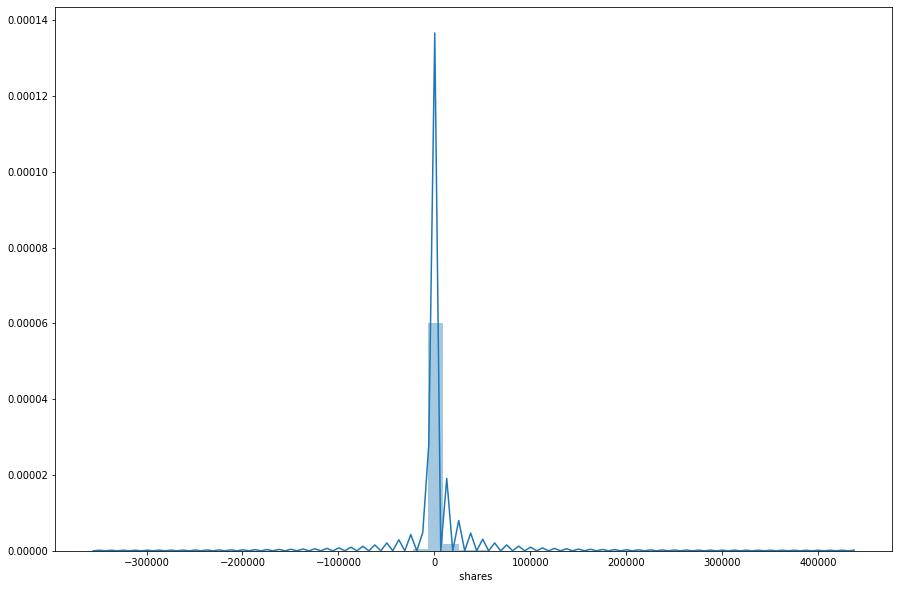

In [114]:
fig = plt.figure(figsize = (15,10))
sns.distplot((y_test-predictions),bins=50);

In [88]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3068.9427014494504
MSE: 93296581.72481693
RMSE: 9659.01556706567


# Neural Network Model

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [116]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
print(X_train.shape,X_test.shape)

(27750, 59) (11894, 59)


In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [146]:
model = Sequential()

model.add(Dense(59,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(59,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(59,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(59,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [147]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=10)

Train on 27750 samples, validate on 11894 samples
Epoch 1/10
27750/27750 [==============================] - 1s 40us/sample - loss: 161063580.7350 - val_loss: 97202050.9063
Epoch 2/10
27750/27750 [==============================] - 1s 23us/sample - loss: 156923356.7859 - val_loss: 96375287.1377
Epoch 3/10
27750/27750 [==============================] - 1s 22us/sample - loss: 156476609.8618 - val_loss: 92700565.4414
Epoch 4/10
27750/27750 [==============================] - 1s 23us/sample - loss: 156266591.6056 - val_loss: 90692738.2653
Epoch 5/10
27750/27750 [==============================] - 1s 23us/sample - loss: 155907122.2866 - val_loss: 88981800.4372
Epoch 6/10
27750/27750 [==============================] - 1s 23us/sample - loss: 155987610.2224 - val_loss: 88518113.7178
Epoch 7/10
27750/27750 [==============================] - 1s 23us/sample - loss: 155821774.7200 - val_loss: 87838146.6945
Epoch 8/10
27750/27750 [==============================] - 1s 23us/sample - loss: 155324297.3748 

In [148]:
losses = pd.DataFrame(model.history.history)

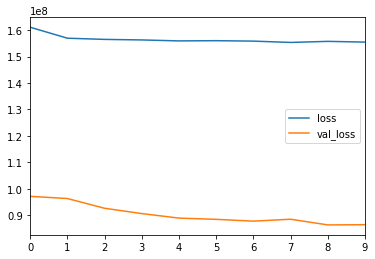

In [149]:
losses.plot()

In [150]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [151]:
X_test

array([[0.48271093, 0.44444444, 0.07564314, ..., 0.5       , 0.9       ,
        0.        ],
       [0.03181189, 0.55555556, 0.0823696 , ..., 0.5       , 1.        ,
        0.        ],
       [0.99723375, 0.44444444, 0.04496106, ..., 0.75      , 1.        ,
        0.5       ],
       ...,
       [0.24204703, 0.33333333, 0.04779325, ..., 0.5       , 1.        ,
        0.        ],
       [0.5615491 , 0.44444444, 0.03044607, ..., 0.5       , 1.        ,
        0.        ],
       [0.3526971 , 0.55555556, 0.02230352, ..., 0.5       , 1.        ,
        0.        ]])

In [152]:
preds = model.predict(X_test)

In [153]:
mean_absolute_error(y_test,preds)

2942.3033974485397

In [154]:
np.sqrt(mean_squared_error(y_test,preds))

9300.28474269549

In [155]:
explained_variance_score(y_test,preds)

-0.01762476944596547

In [156]:
data[' shares'].mean()

3395.3801836343455

In [157]:
data[' shares'].median()

1400.0

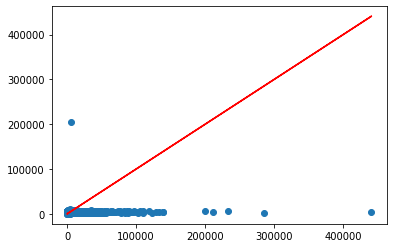

In [158]:
# Our predictions
plt.scatter(y_test,preds)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [159]:
errors = y_test.values.reshape(11894, 1) - preds

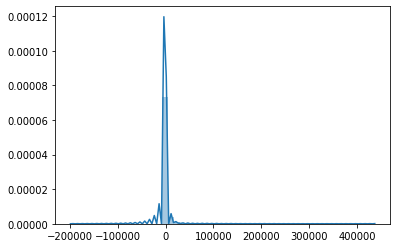

In [160]:
sns.distplot(errors)

In [164]:
example_pred = data.drop(['url',' shares'],axis=1).iloc[0]

In [165]:
example_pred = scaler.transform(example_pred.values.reshape(-1, 59))

In [166]:
example_pred

array([[1.00000000e+00, 5.55555556e-01, 2.58437574e-02, 6.63594492e-01,
        9.99999993e-01, 8.15384621e-01, 2.15053763e-02, 3.07692308e-02,
        7.81250000e-03, 0.00000000e+00, 5.82023972e-01, 4.44444444e-01,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.64550265e-03, 0.00000000e+00,
        2.33487435e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.76698667e-04, 0.00000000e+00, 0.00000000e+00, 5.88165540e-04,
        5.88165540e-04, 5.88165540e-04, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.34641593e-01, 3.96685226e-01,
        2.41986478e-02, 2.54093773e-02, 2.41364785e-02, 5.21617145e-01,
        4.56690988e-01, 3.00065232e-01, 7.40740741e-02, 7.69230769e-01,
        2.30769231e-01, 3.78636364e-01, 1.00000000e-01, 7.00000000e-01,
        6.50000000e-01, 4.00000000e-01, 8.00000000e-01, 5.000000

In [167]:
model.predict(example_pred)

array([[1388.2568]], dtype=float32)

In [168]:
data.iloc[0]

url                              http://mashable.com/2013/01/07/amazon-instant-...
 timedelta                                                                     731
 n_tokens_title                                                                 12
 n_tokens_content                                                              219
 n_unique_tokens                                                          0.663594
                                                       ...                        
 title_subjectivity                                                            0.5
 title_sentiment_polarity                                                  -0.1875
 abs_title_subjectivity                                                          0
 abs_title_sentiment_polarity                                               0.1875
 shares                                                                        593
Name: 0, Length: 61, dtype: object